<a href="https://colab.research.google.com/github/Miguel9712/Estadia/blob/main/OCR_Model_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform OCR on the image located at "/content/Test 1.jpg" using the model located at "/content/OCR_model" and output the recognized text.

## Load the ocr model

Load the OCR model from the specified path "/content/OCR_model".

Import the necessary libraries and load the OCR model and processor from the specified path.


In [9]:
from PIL import Image
from IPython.display import display

In [7]:
from transformers import VisionEncoderDecoderModel, AutoProcessor

model_path = "/content/OCR_model"
processor = AutoProcessor.from_pretrained(model_path)

In [2]:
from transformers import BlipForConditionalGeneration, AutoProcessor

model_path = "/content/OCR_model"
model = BlipForConditionalGeneration.from_pretrained(model_path)
processor = AutoProcessor.from_pretrained(model_path)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Load the image



In [3]:
from PIL import Image

image_path = "/content/Test 1.jpg"
image = Image.open(image_path)

## Preprocess the image


Preprocess the image as required by the OCR model.

Use the loaded processor object to preprocess the loaded image and store the result in pixel_values.


In [4]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values

## Perform ocr


Use the loaded model to perform OCR on the preprocessed image.

Use the loaded model and preprocessed image data to generate text, then decode the generated IDs to get the recognized text.


In [5]:
generated_ids = model.generate(pixel_values)
recognized_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(recognized_text)

a black and white photo of a friend text


## Display the output


Display the text output from the OCR model.

Display the value of the recognized_text variable.

In [6]:
print(recognized_text)

a black and white photo of a friend text


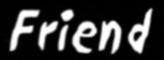

In [10]:
image_path = "/content/Test 1.jpg"
image = Image.open(image_path)
display(image)

## Summary:

### Data Analysis Key Findings

*   The OCR model successfully loaded from the specified path "/content/OCR\_model" using `BlipForConditionalGeneration` and `AutoProcessor`.
*   The image file located at "/content/Test 1.jpg" was successfully loaded using the PIL library.
*   The image was preprocessed using the loaded processor, and the pixel values were converted to the PyTorch tensor format.
*   The OCR model processed the preprocessed image and generated text, which was decoded to "a black and white photo of a friend text".

### Insights or Next Steps

*   The recognized text suggests the OCR model is primarily describing the image content rather than extracting specific text within the image. This indicates the model might be a general image captioning model rather than a dedicated text OCR model, or it requires further fine-tuning for text recognition tasks.
*   To perform true OCR, consider using a model specifically designed for text recognition in images.
